<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">🔥 One Hot Encoding 🔥</div>

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Introduction</div>

In order to fit ML algorithms you have to convert categorical (non-numeric) variables to numeric features before building your model. This process is known as categorical data encoding. There are different encoding techniques available, but the most common and widely used is One Hot Encoding.

There are two popular and commonly used methods:  scikit-learn OneHotEncoder(OHE) and Pandas get_dummies method.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>In essence:</b> one-hot encoding creates a new column for each unique category in a categorical variable and assigns a binary value of 1 or 0 to indicate the presence or absence of that category in a given observation.</div>

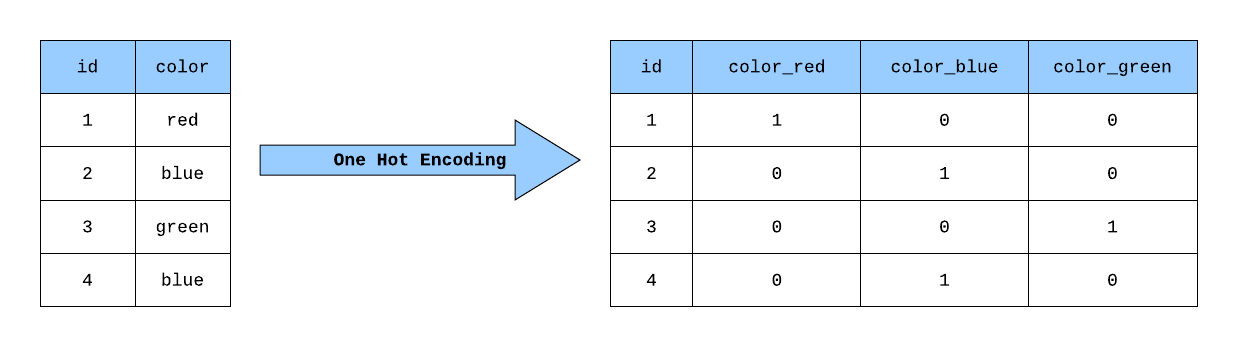

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>One Hot Encoder vs get_dummies</span></b>

get_dummies is a bit more convenient and probably that's why it's a popular method.

The real problem is: handling unknown categorical features which will pop up in production. If the total number of unique values in a categorical column is not the same for our train set vs test set, we are going to have problems. OneHotEncoder is a transformer class, so it can be fitted to data. Once fitted, it is able to transform validation data based on the categories it learned.

Basically, get_dummies can be used in exploratory analysis, whereas OneHotEncoder in computation and estimation.

> Basically **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">get_dummies</mark>** can be used in exploratory analysis, whereas **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">  OneHotEncoder</mark>** in computation and estimation.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>OHE creates a function which saves the exploded categories. </b> It is extremely useful if we want to process the new data and use the same categorical variables, with consistent results. If previously unseen data contains new categories, the encoder will ignore them or raise an error (depending on setting handle_unknown parameter). The key point here is that we can handle the situation with ease.
</div>

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>The dummy variable trap: drop or not to drop?</span></b>

When dealing with categorical features, a common convention is to drop one of the new columns from each feature. The argument comes from statistics: without dropping a column, we know that the sum of all these columns will be 1 in every row. For example, encoding gender as two variables, is_male and is_female, produces two features which are perfectly negatively correlated. This is called the dummy variable trap: perfect multicollinearity between the predictors.

If we decide to drop the first column, the algorithm drops the category value name that comes first alpha-numerically in the set. In the gender example, the first column would be Female since F comes before M.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 10px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
The idea of dropping the first column is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear model. However, a principle of machine learning is to build a highly predictive model. Therefore, we seldom take advantage of very simple models and we usually apply regularization.
</ul>
</div>

<a id="1.2.1"></a>
### <b>1.2.1 <span style='color:#E1B12D'>Multi collinearity effect</span></b>

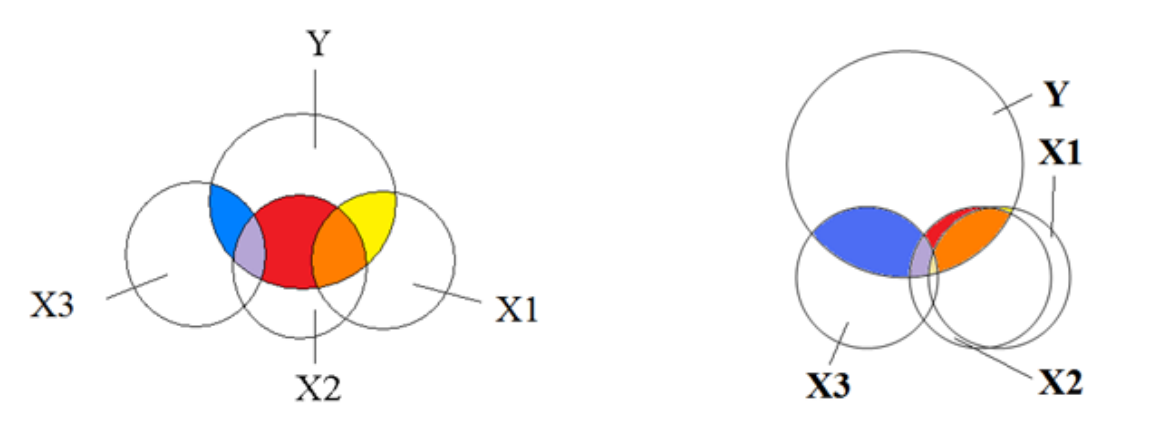

On the left is the situation where there is mild overlap among the
predictors. We can still measure the unique effect of each predictor on Y those are the yellow, red, and blue sections.<br>
The regression coefficients do not include the orange and purple
sections. This means the coefficients themselves are not telling you the
full picture of the effect of each predictor on Y. <br>
As long as you keep that in mind as you interpret coefficients, you’re not
violating assumptions and your model is reliable. But you can’t tell if that
orange section is really attributable to X1 or X2. Or if that distinction even
has any meaning. There is no way to distinguish them.<br>
But in the situation on the right, the overlap between X1 and X2 becomes
so extreme that it can cause the model to have estimation problems.
This is usually what we mean when we say we have multicollinearity.
The model is trying to estimate the unique effect of each predictor on Y,
but there just isn’t enough unique information about X1 and X2 to
calculate it.<br>
If when X1 goes up, so does X2, how can you separately estimate the
effect of a one unit increase of X1 on Y and X2 on Y?

<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Possible drawbacks of dropping a column during one hot encoding</span></b>

1. In the documentation we can read that: “dropping one category breaks the symmetry of the original representation and can therefore induce a bias in downstream models, for instance for penalized linear classification or regression models.”

2. There is one more problem. Take a closer look at the OneHotEncoder’s parameter ‘first’. By checking the documentation we can read that it: “drops the first category in each feature. If only one category is present, the feature will be dropped entirely.” So it can happen that a whole column is dropped, but only if it has only one category. 

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
We can think that in this case the feature is not useful anyway, but consider of a situation where we have to deal with new entries that are present in the test set (and production), but not in the training set. For example we could have only entries regarding females in the training set. If we don't drop a column, the natural thing to do is put all zeros there (i.e. male is not in any of the genders we have seen). If we dropped a column (such as "male") then there is no longer a way to encode the new variable. A reasonable compromise could be to include another column called "other", and drop that if we want to avoid the dummy trap.
</ul>
</div>

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>One Hot Encoding vs very high number of categorical features</span></b>

One-Hot encoding should not be performed if the number of categories is very high. This would result in sparse data. Depending on the use case, we will need to do some exploratory data analysis to do some feature engineering.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>What is a level.</b> Each of the four different colors (Red, Blue, Green, and Yellow) are referred to be levels of the Color feature. One-hot encoding would turn the feature Color into 4 different columns (one for each level). So the number of levels (distinct values that a category can take) in the Color feature is 4.
</div>

Therefore:
<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li>The number of rows should be at least 5 times the number of features.    
<li>For tree-based models, try to keep the number of levels less than 5 for the feature.</ul>
</div>

If the number of levels is large, you could be better off with a different encoding scheme. Feature engineering is the most important aspect of building an effective model.


<a id="1.4.1"></a>
### <b>1.4.1 <span style='color:#E1B12D'>Grouping levels together</span></b>

* Instead of dealing with types of trees, you can introduce classes: coniferous, deciduous.
* Instead of dealing with streets, you can introduce districts: Manhattan, Brooklyn, Queens, Bronx and Staten Island.

<a id="1.4.2"></a>
### <b>1.4.2 <span style='color:#E1B12D'>Creating "Other" column</span></b>

For example: you run an e-commerce business in the European Union and you have customers in all member state countries, but 60% from Germany, 25% for France, 10% from Poland and the remaining 5% across the other 24 countries. 

An encoding such as: MState_GE, MState_FR, MState_PL, MState_OTHER makes sense in this context.

<a id="1.5"></a>
## <b>1.5 <span style='color:#E1B12D'>Pipelines and One Hot Encoding</span></b>

Pandas get_dummies is not compatible with the Scikit-learn pipeline. OneHotEncoder matches scikit-learn’s transformer API and therefore it is compatible with pipeline and is easy to use for our convenience.

<a id="1.6"></a>
## <b>1.6 <span style='color:#E1B12D'>One Hot Encoding - before or after train-test split?</span></b>

We will encounter errors when fitting a model on the training set and predict on test features of different shapes.
That's why a lot of people advise to perform one hot encoding before the train-test split.

Generally you should to treat the test set as though you did not have it during training. Performing the encoding before the split will lead to data leakage (train-test contamination). For example - the test set could contain one or more categories that were not present in a training set. It happens in real life applications all the time.

However, if the goal is exploratory data analysis, one-hot encoding can be performed before splitting the data into training and testing sets.

<a id="1.7"></a>
## <b>1.7 <span style='color:#E1B12D'>Best practices</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li>Scikit-learn's OneHotEncoder is a much better choice for machine learning than Pandas get_dummies. You can still take advantage of Pandas get_dummies for data preparation and exploratory data analysis.
<li>You should perform One Hot Encoding before train-test split to avoid data leakage (train-test contamination).
<li> One hot encoding doesn't scale well when the number of output labels is large. For example, in language modeling the number of output labels is extremely large. This means that after one hot encoding we will get the huge number of fetures.
<li> Tree-based models struggle if there are a large number of levels, regardless of how much data we have.
<li> Linear models can deal with a large number of levels, provided we have enough data to accurately estimate the coefficients.
<li> Take advantage of feature engineering to reduce the number of outputs to improve the effectiveness of your model if you are one-hot encoding the feature.
<li> The idea of dropping the first column is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear model. 
<li> After one hot encoding every vector is in equal distance from every other vector. In some scenarios the distributed representation can capture more important information (e.g. for NLP tasks).
</ul>
</div>

<a id="1.8"></a>
## <b>1.8 <span style='color:#E1B12D'>Simple examples</span></b>

In [2]:
import pandas as pd
data=pd.DataFrame(pd.Series(['red','green','blue']))
# new_data has two values that data does not have. 
new_data= pd.DataFrame(pd.Series(['red','green','blue','yellow','purple']))

<a id="1.8.1"></a>
### <b>1.8.1 <span style='color:#E1B12D'>Using get_dummies</span></b>

In [3]:
gd_df = pd.get_dummies(data)
print(gd_df)

   0_blue  0_green  0_red
0   False    False   True
1   False     True  False
2    True    False  False


get_dummies returns a DataFrame.

In [4]:
col_list = gd_df.columns.tolist()
new_df = pd.get_dummies(new_data)
# handle unknow by using .reindex and .fillna()
new_df = new_df.reindex(columns=col_list).fillna(0)
print(new_df)

   0_blue  0_green  0_red
0   False    False   True
1   False     True  False
2    True    False  False
3   False    False  False
4   False    False  False


<a id="1.8.2"></a>
### <b>1.8.2 <span style='color:#E1B12D'>Using OneHotEncoder</span></b>

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(data)
ohe.transform(new_data)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

OneHotEncoder returns an array-like object of encoded data, which can be later transformed into a dense matrix or dataframe.